<a href="https://colab.research.google.com/github/jessicakimbril/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read in the data
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [3]:
# vabin class is categorical
# it can be displayed using string values or numbers
df['cabin_class'] = df['Pclass'].map({1: 'first', 2:'second', 3:'third'})
df[['cabin_class', 'Pclass']].head(5)

,cabin_class,Pclass
0,third,3
1,first,1
2,third,3
3,first,1
4,third,3


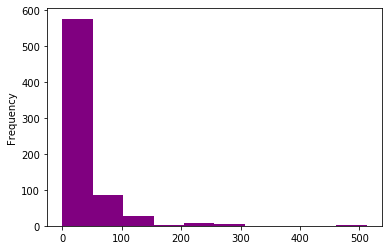

In [4]:
# fare is a continuous variable, so we can display it with a histogram
f['Fare'].plot(kind='hist', color='purple');

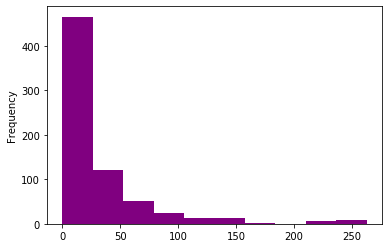

In [5]:
# remove two extreme outliers
df = df[df['Fare']<500]
df['Fare'].plot(kind='hist', color='purple')

In [0]:
# a continuous variable can be converted to a categorical var using binning
farebins = [0, 8, 15, 33, 512]
farelabels = ['low', 'medium', 'high', 'vhigh']

df['fare_groups'] = pd.cut(df['Fare'],
                           bins = farebins,
                           labels = farelabels)

In [7]:
# lets see
myresults = df['fare_groups'].value_counts().sort_index()
myresults

low       154
medium    189
high      185
vhigh     174
Name: fare_groups, dtype: int64

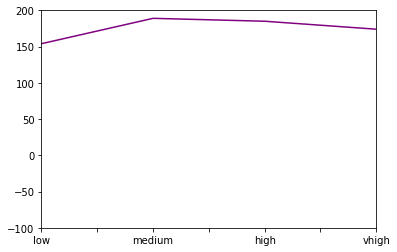

In [9]:
# its important to specify the range of your y-axis
myresults.plot(ylim=(-100,200), color='purple');

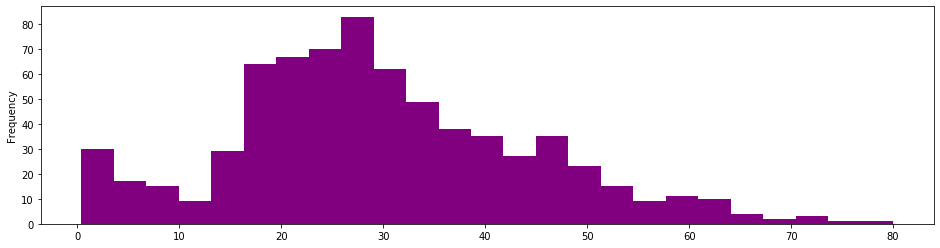

In [13]:
# Histogram
df['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='purple')

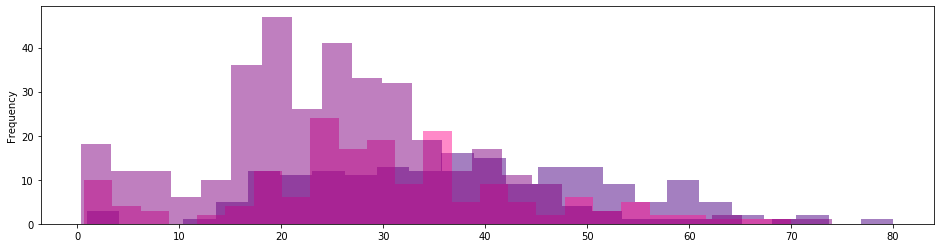

In [17]:
# Stacked Histogram
df[df['cabin_class']=='first']        ['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='indigo', alpha=0.5);
df[df['cabin_class']=='second']       ['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='deeppink', alpha=0.5);
df[df['cabin_class']=='third']        ['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='purple', alpha=0.5);

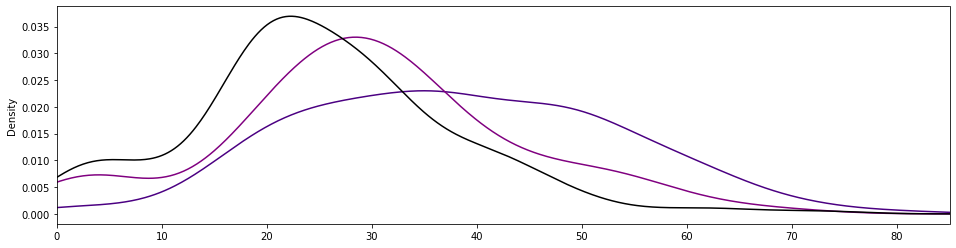

In [21]:
# Kernel Density Estimate (KDE)
df[df['cabin_class']=='first']        ['Age'].plot(kind='density', xlim=(0,85), figsize=(16,4), color='indigo');
df[df['cabin_class']=='second']       ['Age'].plot(kind='density', xlim=(0,85), figsize=(16,4), color='purple');
df[df['cabin_class']=='third']        ['Age'].plot(kind='density', xlim=(0,85), figsize=(16,4), color='black');

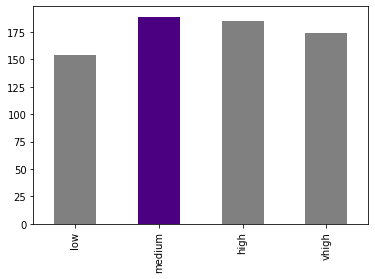

In [22]:
# Bar chart
myresults = df['fare_groups'].value_counts().sort_index()
myresults.plot(kind='bar', color=['gray', 'indigo', 'gray']);

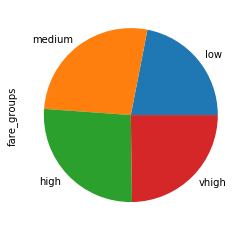

In [24]:
# Pie chart
myresults.plot(kind='pie');

In [26]:
# Crosstab
cab_death = pd.crosstab(df['cabin_class'], df['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


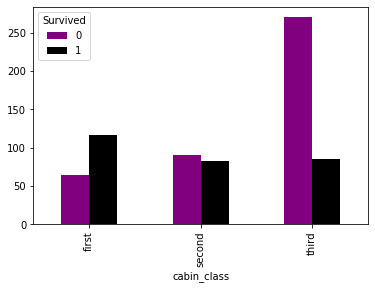

In [29]:
# Bar chart
cab_death.plot(kind='bar', color=['purple', 'black']);

In [30]:
# Crosstab
cab_death1 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


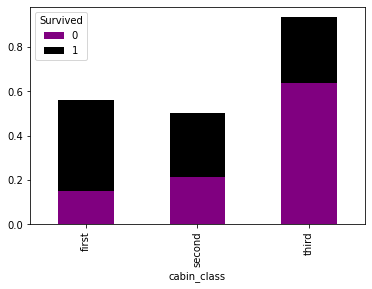

In [32]:
# Stacked bar chart
cab_death1.plot(kind='bar', stacked=True, color=['purple', 'black']);

In [35]:
# Crosstab with row percents
cab_death2 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='index')
cab_death2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


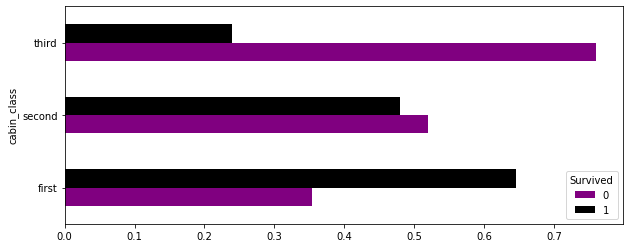

In [37]:
# Bar chart for comparison of two categorical variables
cab_death2.plot(kind='barh', figsize=(10,4), color=['purple', 'black']);

In [38]:
# Look at a single continuous variable
df['Age'].mean()

29.618011283497882

In [39]:
# Now explore that continuous variable broken out by categorical variable
cab_age = df.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

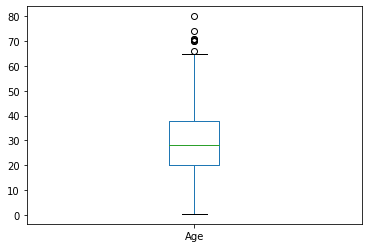

In [40]:
# To visualize a single continurous variable, you can jsut use .plot with kind=box
df['Age'].plot(kind='box');

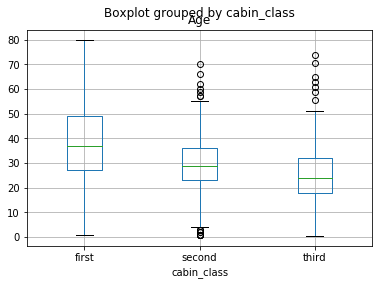

In [42]:
# Break out a continuous variable by a categorical variable, use .boxplot
df.boxplot(column='Age', by='cabin_class');

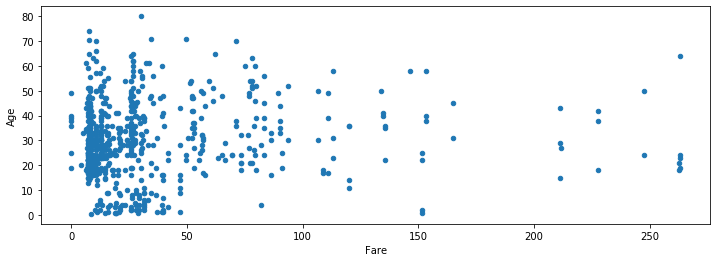

In [44]:
df.plot(kind='scatter', x='Fare', y='Age', figsize=(12,4));

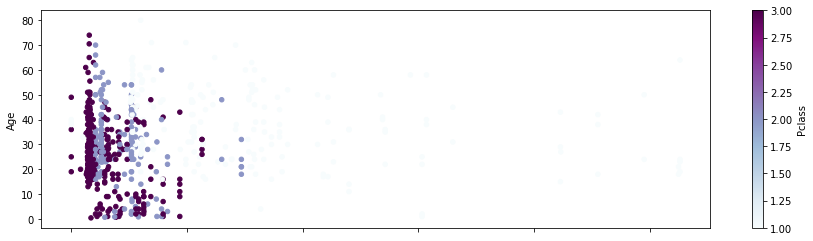

In [45]:
df.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='BuPu', figsize=(15,4));

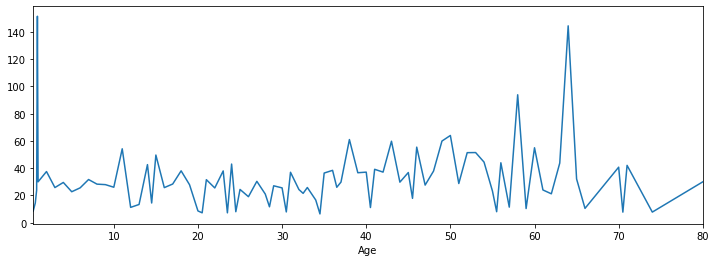

In [46]:
df.groupby('Age')['Fare'].mean().plot(figsize=(12,4), kind='line');

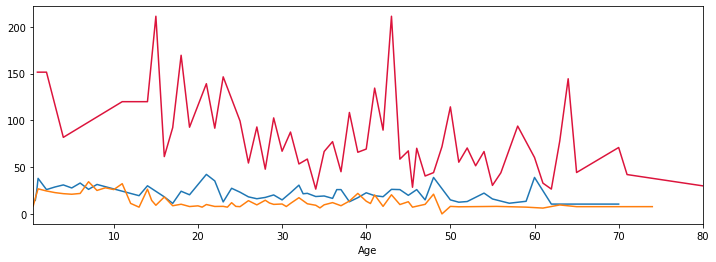

In [54]:
# Line chart: age by fare and cabin class
mycolors = ['crimson', 'purple', 'dodgeblue']
# Rather than specifying 3 plots you can just loop through the value
df[df['cabin_class']=='first'].groupby('Age')['Fare'].mean().plot(figsize=(12,4), color='crimson');
df[df['cabin_class']=='second'].groupby('Age')['Fare'].mean().plot(figsize=(12,4));
df[df['cabin_class']=='third'].groupby('Age')['Fare'].mean().plot(figsize=(12,4));

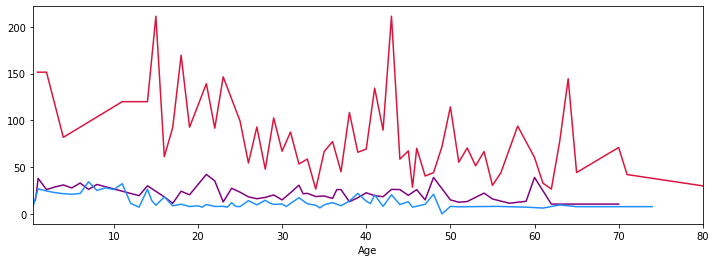

In [55]:
# Do this more elegantly with a list
# Line chart: age by fare and cabin class
mycolors = ['crimson', 'purple', 'dodgerblue']
cab_classes = ['first', 'second', 'third']
# Rather than specifying 3 plots
for x in [0,1,2]:
  df[df['cabin_class']==cab_classes[x]].groupby('Age')['Fare'].mean().plot(figsize=(12,4), color=mycolors[x]);

In [56]:
# Correlation matrix
corr_matrix = df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


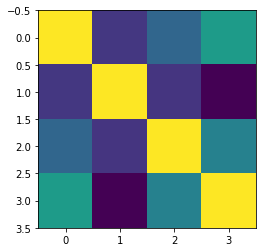

In [58]:
# Display the correlation matrix as a heatmap
plt.imshow(corr_matrix);

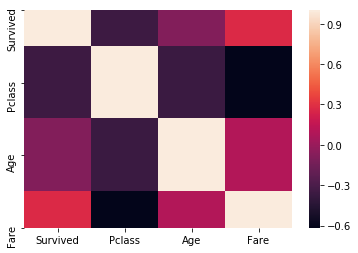

In [59]:
# Seaborn
sns.heatmap(corr_matrix);

In [0]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/congress-age/congress-terms.csv'
df = pd.read_csv(url)

In [69]:
df.head(5)

,congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
0,80,house,M000112,Joseph,Jefferson,Mansfield,NaN,1861-02-09,TX,D,Yes,1947-01-03,85.9
1,80,house,D000448,Robert,Lee,Doughton,NaN,1863-11-07,NC,D,Yes,1947-01-03,83.2
2,80,house,S000001,Adolph,Joachim,Sabath,NaN,1866-04-04,IL,D,Yes,1947-01-03,80.7
3,80,house,E000023,Charles,Aubrey,Eaton,NaN,1868-03-29,NJ,R,Yes,1947-01-03,78.8
4,80,house,L000296,William,NaN,Lewis,NaN,1868-09-22,KY,R,No,1947-01-03,78.3


In [76]:
print(df['termstart'])

0        1947-01-03
1        1947-01-03
2        1947-01-03
3        1947-01-03
4        1947-01-03
            ...    
18630    2013-01-03
18631    2013-01-03
18632    2013-01-03
18633    2013-01-03
18634    2013-01-03
Name: termstart, Length: 18635, dtype: object


In [87]:
# A continuous variable (termstart) can be converted to a categorical var using binning.
tsbins=[1950, 1960, 1970, 1980, 1990, 2000, 2010]
tslabels=['1950', '60', '70', '80', '90', '2000', '10']

df['termstart']=pd.cut(df['termstart'],
                        bins=tsbins,
                        labels=tslabels)

TypeError: ignored

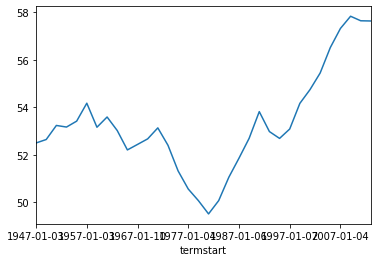

In [84]:
df.groupby('termstart')['age'].mean().plot(kind='line');

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here